# Step 2: Cluster Network Identification Tool
Used to determine cluster networks, coordination numbers, SAXS patterns from cluster distributions, cluster shape function distributions in PDF.

## Custom Imports
Relative import the custom classes to support the cluster network tool.

In [ ]:
# Import and run the setup script
import sys, os

# Ensure the project root is in sys.path to locate setup_env
project_root = os.path.abspath(os.path.join(os.getcwd(), '..'))
if project_root not in sys.path:
    sys.path.append(project_root)

# Import the setup helper and configure the environment
from setup_env import setup_environment

# Capture the imported classes from setup_environment
PDBEditor, TrajectoryProcessor, PDBFileHandler, Atom, ClusterNetwork, ClusterBatchAnalyzer = setup_environment()

## Cluster Network Identification
Description: Used to identify and parse cluster networks from MD trajectories and single PDB files.

Prerequisites: PDB files are required for cluster network identification. It is recommended that the user uses 'Step 1' notebook, 'fileconversion.ipynb' to preprocess their PDB formatted MD trajectory file into a folder of PDB files. 

Inputs: User supplies a path to a single PDB file, or a folder of PDB files. User supplies lists of atoms to define the cluster network, as well as cutoff parameters for the nearest-neighbor search. 

PLEASE READ: It is recommended to begin WITHOUT including solvent atoms as nearest neighbors within the search network. Use strictly solute atoms, and we can add in coordinating solvent in the following steps.'

----
SOLUTE COORDINATION NETWORK SEARCH
- core_residue_names (lst, str): Indicates which atoms belong to the solute atoms that form clusters to be identified, based on their assigned residue number.

- shell_residue_names (lst, str): Indicates which atoms below to solvent molecules, or counterions in solution. These may be inside the coordination sphere of the solute atoms, or may themselves be solute atoms or molecules that act as counterions. 

- node_elements (lst, str): Identifies the elements within the list of core_residue_names that act as nodes within a coordination network. 

- linker_elements (lst, str): Identifies elements that act as linkers between node elements. This can include other node elements, if multiple nodes can exist within a single cluster.

- terminator_elements (lst, str): Identifies a list of elements that can act as terminator elements to the cluster. This could eventually be extended to residue names.

- segment_cutoff (float): Designates the maximum distance for a node and linker element to be considered part of the same coordination network. 

----
INCLUDING SOLVENT IN THE COORDINATION NETWORK SEARCH (COORDINATED SHELL)
- target_elements (lst, str): Elements in the main cluster to consider for coordination to solvent atoms.
- neighbor_elements (lst, str): Neighboring elements in the shell/solvent residues. A single atom in the molecule that is closest to the solute atom can represent the entire molecule (i.e., O atoms in DMSO).
- distance_thresholds (dictionary): Set the coordination distance thresholds for each atom-atom pair.

### SINGLE FRAME: Isolate Atom Clusters as PDB Files - No Solvent

In [12]:
# Define the path to the PDB file and initialize the handler
pdb_file_path = '/Users/keithwhite/repos/MDScatter/data/example/frame_0001.pdb'
core_residue_names = ['PBI']
shell_residue_names = ['DMS']
pdb_handler = PDBFileHandler(pdb_file_path, core_residue_names, shell_residue_names)

# Initialize ClusterNetwork with relevant parameters
node_elements = ['Pb']
linker_elements = ['Pb', 'I']
terminator_elements = ['I']
segment_cutoff = 3.7
cluster_network = ClusterNetwork(
    pdb_handler.core_atoms,
    pdb_handler.shell_atoms,
    node_elements,
    linker_elements,
    terminator_elements,
    segment_cutoff,
    core_residue_names,
    shell_residue_names
)

## -- OUTPUT THE FILES
# Output directory for the PDB files
output_directory = '/Users/keithwhite/repos/MDScatter/data/example'
folder_name = "solute_cluster_pdb_files"  # Folder to be created

# Write the cluster PDB files with the coordinated shell residues
cluster_network.write_individual_cluster_pdb_files(pdb_handler, output_directory, folder_name)

Folder already exists. Creating folder with timestamp: solute_cluster_pdb_files_240920_164337
Written PDB file for cluster AAA to /Users/keithwhite/repos/MDScatter/data/example/solute_cluster_pdb_files_240920_164337/frame_0001_AAA.pdb
Written PDB file for cluster AAB to /Users/keithwhite/repos/MDScatter/data/example/solute_cluster_pdb_files_240920_164337/frame_0001_AAB.pdb
Written PDB file for cluster AAC to /Users/keithwhite/repos/MDScatter/data/example/solute_cluster_pdb_files_240920_164337/frame_0001_AAC.pdb
Written PDB file for cluster AAD to /Users/keithwhite/repos/MDScatter/data/example/solute_cluster_pdb_files_240920_164337/frame_0001_AAD.pdb
Written PDB file for cluster AAE to /Users/keithwhite/repos/MDScatter/data/example/solute_cluster_pdb_files_240920_164337/frame_0001_AAE.pdb
Written PDB file for cluster AAF to /Users/keithwhite/repos/MDScatter/data/example/solute_cluster_pdb_files_240920_164337/frame_0001_AAF.pdb
Written PDB file for cluster AAG to /Users/keithwhite/repos/

### SINGLE FRAME: Visualize cluster networks in a single frame with your given input conditions. 

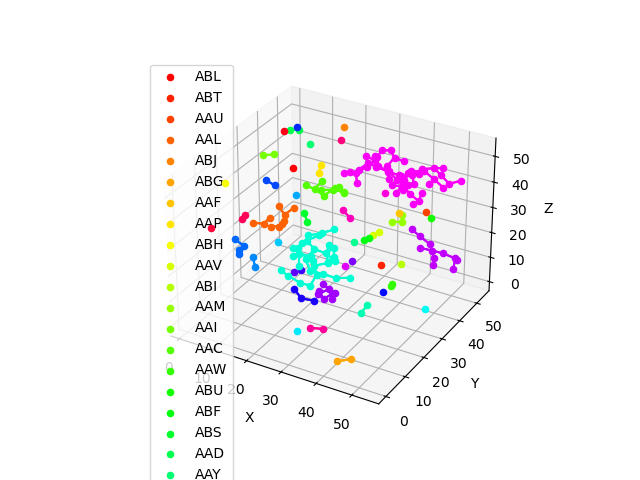

In [14]:
%matplotlib widget

# Visualize the atom networks in 3D
cluster_network.visualize_networks()

### SINGLE FRAME: Isolate Atom Clusters as PDB Files - Including Solvent

In [ ]:
# Define the path to the PDB file and initialize the handler
pdb_file_path = '/Users/keithwhite/repos/MDScatter/data/example/frame_0001.pdb'
core_residue_names = ['PBI']
shell_residue_names = ['DMS']
pdb_handler = PDBFileHandler(pdb_file_path, core_residue_names, shell_residue_names)

# Initialize ClusterNetwork with relevant parameters
node_elements = ['Pb']
linker_elements = ['Pb', 'I']
terminator_elements = ['I']
segment_cutoff = 3.7
cluster_network = ClusterNetwork(
    pdb_handler.core_atoms,
    pdb_handler.shell_atoms,
    node_elements,
    linker_elements,
    terminator_elements,
    segment_cutoff,
    core_residue_names,
    shell_residue_names
)

## -- SPECIFY NEIGHBORING SOLVENT ELEMENTS
# Specify the inputs for coordination
target_elements = ['Pb']  # Elements in the main cluster to consider for coordination
neighbor_elements = ['O']  # Neighboring elements in the shell residues
distance_thresholds = {('Pb', 'O'): 3}  # Coordination thresholds

## -- OUTPUT THE FILES
# Output directory for the PDB files
output_directory = '/Users/keithwhite/repos/MDScatter/data/example'
folder_name = "solute-solvent_cluster_pdb_files"  # Folder to be created


# Write the cluster PDB files with the coordinated shell residues
cluster_network.write_cluster_pdb_files_with_coordinated_shell(pdb_handler, output_directory, folder_name, target_elements, neighbor_elements, distance_thresholds, shell_residue_names)

### SINGLE FRAME: Rename each cluster with a unique residue name and generate a new PDB file.

In [ ]:
# Define the path to the PDB file and initialize the handler
pdb_file_path = '/Users/keithwhite/repos/MDScatter/data/example/frame_0001.pdb'
core_residue_names = ['PBI']
shell_residue_names = ['DMS']
pdb_handler = PDBFileHandler(pdb_file_path, core_residue_names, shell_residue_names)

# Initialize ClusterNetwork with relevant parameters
node_elements = ['Pb']
linker_elements = ['Pb', 'I']
terminator_elements = ['I']
segment_cutoff = 3.7
cluster_network = ClusterNetwork(
    pdb_handler.core_atoms,
    pdb_handler.shell_atoms,
    node_elements,
    linker_elements,
    terminator_elements,
    segment_cutoff,
    core_residue_names,
    shell_residue_names
)

## -- OUTPUT Information
output_path = "/Users/keithwhite/repos/MDScatter/data/example"
output_filename = "output_test.pdb"

# Rename clusters in the PDB file and save the result as a single PDB file
cluster_network.rename_clusters_in_pdb(pdb_handler, output_path, output_filename)

### MULTIPLE FRAMES: Batch Process MD Frames to Extract Clusters - Including Solvent

In [ ]:
# Define the paths for input and output directories
input_pdb_directory = '/Users/keithwhite/repos/run_fullrmc/md_sim/travis_md_crnb/PbI2_DMSO_0.8M_cr_nb/split_pdb'  # Path to the folder with PDB files
output_directory = '/Users/keithwhite/repos/run_fullrmc/md_sim/travis_md_crnb/PbI2_DMSO_0.8M_cr_nb/clusters_pdb'

# Core and shell residue names (customize as needed)
core_residue_names = ['PBI']
shell_residue_names = ['DMS']

# Ensure the output directory exists
if not os.path.exists(output_directory):
    os.makedirs(output_directory)

# Cluster network parameters
node_elements = ['Pb']
linker_elements = ['Pb', 'I']
terminator_elements = ['I']
segment_cutoff = 3.6

# Coordination inputs
target_elements = ['Pb']  # Elements in the main cluster to consider for coordination
neighbor_elements = ['O']  # Neighboring elements in the shell residues
distance_thresholds = {('Pb', 'O'): 3}  # Coordination thresholds

# Loop through all PDB files in the input directory
for pdb_file_name in os.listdir(input_pdb_directory):
    if pdb_file_name.endswith('.pdb'):
        pdb_file_path = os.path.join(input_pdb_directory, pdb_file_name)
        
        # Initialize the PDB handler
        pdb_handler = PDBFileHandler(pdb_file_path, core_residue_names, shell_residue_names)

        # Initialize ClusterNetwork with relevant parameters
        cluster_network = ClusterNetwork(
            pdb_handler.core_atoms,
            pdb_handler.shell_atoms,
            node_elements,
            linker_elements,
            terminator_elements,
            segment_cutoff,
            core_residue_names,
            shell_residue_names
        )

        # Write the cluster PDB files with the coordinated shell residues
        cluster_network.write_cluster_pdb_files_with_coordinated_shell(
            pdb_handler, 
            output_directory, 
            target_elements, 
            neighbor_elements, 
            distance_thresholds, 
            shell_residue_names
        )

print("Cluster isolation and PDB file generation complete.")